In [1]:
import numpy as np
import pandas as pd

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [12]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder = LabelEncoder()

In [16]:
# Create a 'Species' column using the 'target' column
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['Species'] = df['target'].map(species_mapping)

# Encode the 'Species' column
df['Species'] = encoder.fit_transform(df['Species'])

In [20]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0

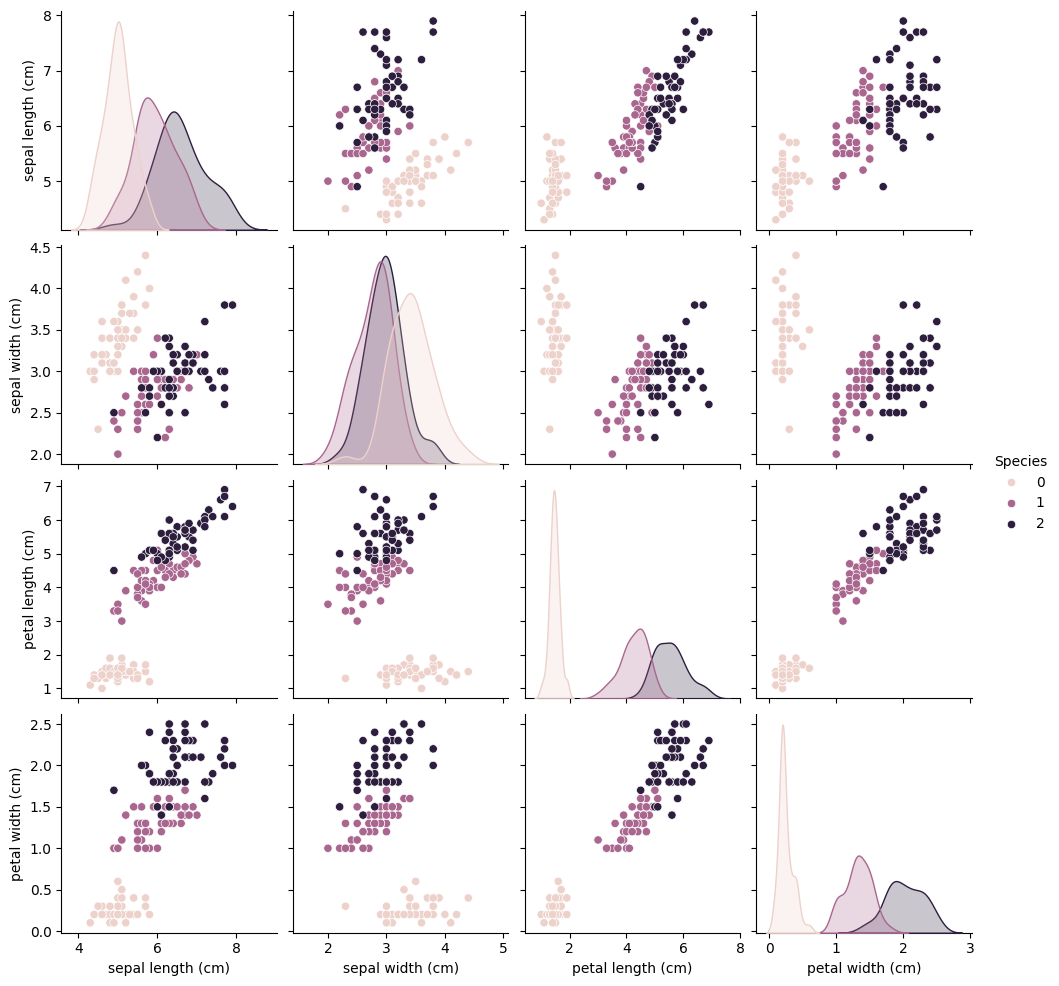

In [23]:
import seaborn as sns
sns.pairplot(df, hue='Species') # hue: Column name in data to map plot aspects to different colors.


### Observations:
1. Setosa species is well-separated from the other two species in terms of petal length and petal width.
2. Versicolor and virginica species have some overlap in their feature distributions, but they can still be distinguished based on petal length and petal width.
3. Sepal length and sepal width are less effective in distinguishing between the species compared to petal length and petal width.

4. Overall, petal length and petal width are the most important features for distinguishing between the three species of iris flowers.

In [33]:
new_df = df[df['Species'] != 0][['sepal length (cm)', 'sepal width (cm)', 'Species']]

In [34]:
new_df.head()

sepal length (cm)  sepal width (cm)  Species
50                7.0               3.2        1
51                6.4               3.2        1
52                6.9               3.1        1
53                5.5               2.3        1
54                6.5               2.8        1

In [36]:
new_df.shape

(100, 3)

In [39]:
X = df.iloc[:, 0:2].values # Get the first two columns as a numpy array

In [40]:
y = df.iloc[:, -1].values # Get the last column as a numpy array

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [42]:
clf1 = LogisticRegression()
clf2 = KNeighborsClassifier()
clf3 = RandomForestClassifier()

In [43]:
estimators = [('lr', clf1), ('knn', clf2), ('rf', clf3)]

In [51]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.81
knn 0.76
rf 0.71


In [52]:
from sklearn.ensemble import VotingClassifier

### Hard Voting:

In [53]:
vc = VotingClassifier(estimators=estimators, voting='hard')
x = cross_val_score(vc, X, y, cv=5, scoring='accuracy')

In [54]:
print(f'Voting Classifier: {x.mean()}')

Voting Classifier: 0.78


### Soft Voting

In [55]:
vc1 = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc1, X, y, cv=5, scoring='accuracy')
print(f'Voting Classifier (soft): {x.mean()}')

Voting Classifier (soft): 0.78


### Weighted Voting

In [57]:
for i in range(1, 4):
    for j in range(1, 4):
        for k in range(1, 4):
            vc = VotingClassifier(estimators=estimators, voting='soft', weights=[i, j, k])
            x = cross_val_score(vc, X, y, cv=5, scoring='accuracy')
            print(f'Voting Classifier (soft) with weights {i, j, k}: {x.mean()}')

Voting Classifier (soft) with weights (1, 1, 1): 0.78
Voting Classifier (soft) with weights (1, 1, 2): 0.7666666666666667
Voting Classifier (soft) with weights (1, 1, 3): 0.78
Voting Classifier (soft) with weights (1, 2, 1): 0.7733333333333333
Voting Classifier (soft) with weights (1, 2, 2): 0.7866666666666667
Voting Classifier (soft) with weights (1, 2, 3): 0.7733333333333333
Voting Classifier (soft) with weights (1, 3, 1): 0.78
Voting Classifier (soft) with weights (1, 3, 2): 0.7733333333333333
Voting Classifier (soft) with weights (1, 3, 3): 0.7666666666666667
Voting Classifier (soft) with weights (2, 1, 1): 0.7866666666666667
Voting Classifier (soft) with weights (2, 1, 2): 0.7866666666666667
Voting Classifier (soft) with weights (2, 1, 3): 0.78
Voting Classifier (soft) with weights (2, 2, 1): 0.78
Voting Classifier (soft) with weights (2, 2, 2): 0.78
Voting Classifier (soft) with weights (2, 2, 3): 0.78
Voting Classifier (soft) with weights (2, 3, 1): 0.7866666666666667
Voting Cla

Based on the results of the Voting Classifier with different weights, we can conclude:

1. **Best Performance**: The highest accuracy (0.7933) was achieved with weights (3, 2, 1) and (3, 3, 1), indicating that giving more weight to Logistic Regression yields the best performance.
2. **Consistent Performance**: Weights (2, 1, 1), (2, 1, 2), (2, 3, 1), (3, 1, 1), and (3, 1, 2) also performed well (0.7867), showing Logistic Regression's consistent positive contribution.
3. **Weight Sensitivity**: The classifier's performance is sensitive to weight adjustments, highlighting the importance of tuning these parameters.
4. **Soft Voting**: Generally provides better performance than hard voting by considering predicted probabilities.

In summary, the optimal weights are (3, 2, 1) or (3, 3, 1), with Logistic Regression having the highest weight.

### Classifier of Same Algorithm:

In [58]:
from sklearn.svm import SVC

In [59]:
from sklearn.datasets import make_classification

In [60]:
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_clusters_per_class=1, random_state=42)

svm1 = SVC(probability=True, kernel='poly', degree = 1)
svm2 = SVC(probability=True, kernel='poly', degree = 2)
svm3 = SVC(probability=True, kernel='poly', degree = 3)
svm4 = SVC(probability=True, kernel='poly', degree = 4)
svm5 = SVC(probability=True, kernel='poly', degree = 5)

estimators = [('svm1', svm1), ('svm2', svm2), ('svm3', svm3), ('svm4', svm4), ('svm5', svm5)]
for estimator in estimators:
    x = cross_val_score(estimator[1], X, y, cv=5, scoring='accuracy')
    print(estimator[0], np.round(np.mean(x), 2))

svm1 0.98
svm2 0.95
svm3 0.95
svm4 0.86
svm5 0.81


In [61]:
vc2 = VotingClassifier(estimators=estimators, voting='soft')
x = cross_val_score(vc2, X, y, cv=5, scoring='accuracy')
print(f'Voting Classifier (soft): {x.mean()}')

Voting Classifier (soft): 0.984


In [62]:
vc3 = VotingClassifier(estimators=estimators, voting='hard')
x = cross_val_score(vc3, X, y, cv=5, scoring='accuracy')
print(f'Voting Classifier (hard): {x.mean()}')

Voting Classifier (hard): 0.9400000000000001


varying hyperparameters in the same algorithm (svm) allows fine-tuning performance; different configurations (degrees) yield varied accuracy, showing the importance of hyperparameter selection.